### Data Exploration

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Concrete_Data.csv")

In [11]:
# Rename columns for easier access
df.columns = [
    "Cement", "Blast_Furnace_Slag", "Fly_Ash", "Water", "Superplasticizer", 
    "Coarse_Aggregate", "Fine_Aggregate", "Age", "Compressive_Strength"
]

In [12]:
# Display basic info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast_Furnace_Slag    1030 non-null   float64
 2   Fly_Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse_Aggregate      1030 non-null   float64
 6   Fine_Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None


In [13]:
# Display first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age  Compressive_Strength  
0            1040.0           676.0   28                 79.99  
1            1055.0           676.0   28                 61.89  
2             932.0           594.0  270                 40.27  
3             932.0           594.0  365                 41.05  
4             978.4           825.5  360                 44.30  


In [14]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Cement                  0
Blast_Furnace_Slag      0
Fly_Ash                 0
Water                   0
Superplasticizer        0
Coarse_Aggregate        0
Fine_Aggregate          0
Age                     0
Compressive_Strength    0
dtype: int64


In [15]:
# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
            Cement  Blast_Furnace_Slag      Fly_Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse_Aggregate  Fine_Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.00000

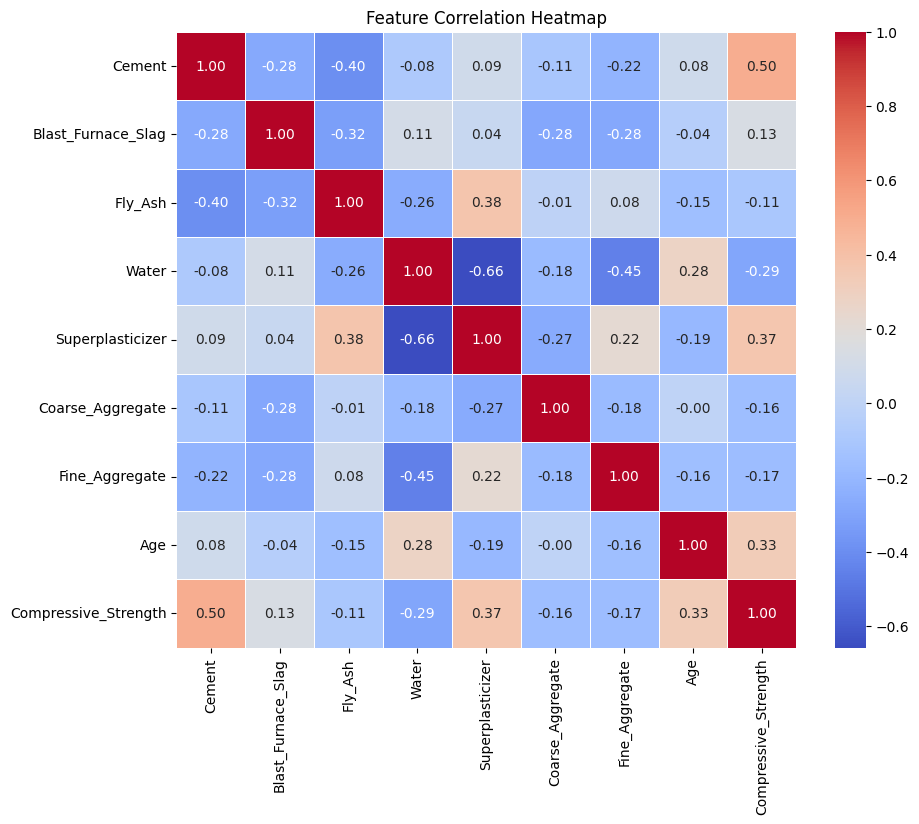

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Data Cleaning (Handle missing values, Outliers, and inconsistencies)

In [17]:
from sklearn.preprocessing import StandardScaler

# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_clean

In [18]:
# Remove outliers
df_clean = remove_outliers(df, df.columns)

# Standardize feature values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean.drop(columns=["Compressive_Strength"]))

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_clean.drop(columns=["Compressive_Strength"]).columns)
df_scaled["Compressive_Strength"] = df_clean["Compressive_Strength"].values

# Display cleaned dataset info
print("\nDataset after cleaning:")
print(df_scaled.describe())


Dataset after cleaning:
             Cement  Blast_Furnace_Slag       Fly_Ash         Water  \
count  9.410000e+02        9.410000e+02  9.410000e+02  9.410000e+02   
mean  -1.963242e-16        4.530559e-17 -3.020373e-17  3.020373e-17   
std    1.000532e+00        1.000532e+00  1.000532e+00  1.000532e+00   
min   -1.706358e+00       -8.557403e-01 -9.019152e-01 -2.861309e+00   
25%   -8.392606e-01       -8.557403e-01 -9.019152e-01 -8.387890e-01   
50%   -1.990028e-01       -6.240229e-01 -9.019152e-01  1.698028e-01   
75%    7.191583e-01        8.242110e-01  9.370473e-01  6.073929e-01   
max    2.594760e+00        3.107786e+00  2.208621e+00  2.528520e+00   

       Superplasticizer  Coarse_Aggregate  Fine_Aggregate           Age  \
count      9.410000e+02      9.410000e+02    9.410000e+02  9.410000e+02   
mean      -3.020373e-17      1.736714e-16   -1.026927e-15 -6.040746e-17   
std        1.000532e+00      1.000532e+00    1.000532e+00  1.000532e+00   
min       -1.170347e+00     -2.2396

### Feature Engineering (Transform and prepare data for ML models)

In [19]:
from sklearn.model_selection import train_test_split

# Define input features and target variable
X = df_scaled.drop(columns=["Compressive_Strength"])
y = df_scaled["Compressive_Strength"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shape
print("\nTrain-Test Split:")
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Train-Test Split:
Training Set: (752, 8), Testing Set: (189, 8)


### Model Building (Train multiple ML models)

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Support Vector Regression": SVR(kernel="rbf"),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
}

In [24]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R² Score": r2, "MAE": mae}

In [25]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display model performance
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                                RMSE  R² Score       MAE
Linear Regression          67.165905  0.741651  6.399828
Ridge Regression           67.184197  0.741580  6.401220
Lasso Regression           67.188660  0.741563  6.400849
Support Vector Regression  76.498996  0.705752  6.642540
Decision Tree              72.284021  0.721964  5.602778
Random Forest              30.383670  0.883131  3.889850
Gradient Boosting          33.838690  0.869842  4.408118
XGBoost                    26.519797  0.897993  3.531720
Neural Network (MLP)       37.483831  0.855821  4.480141


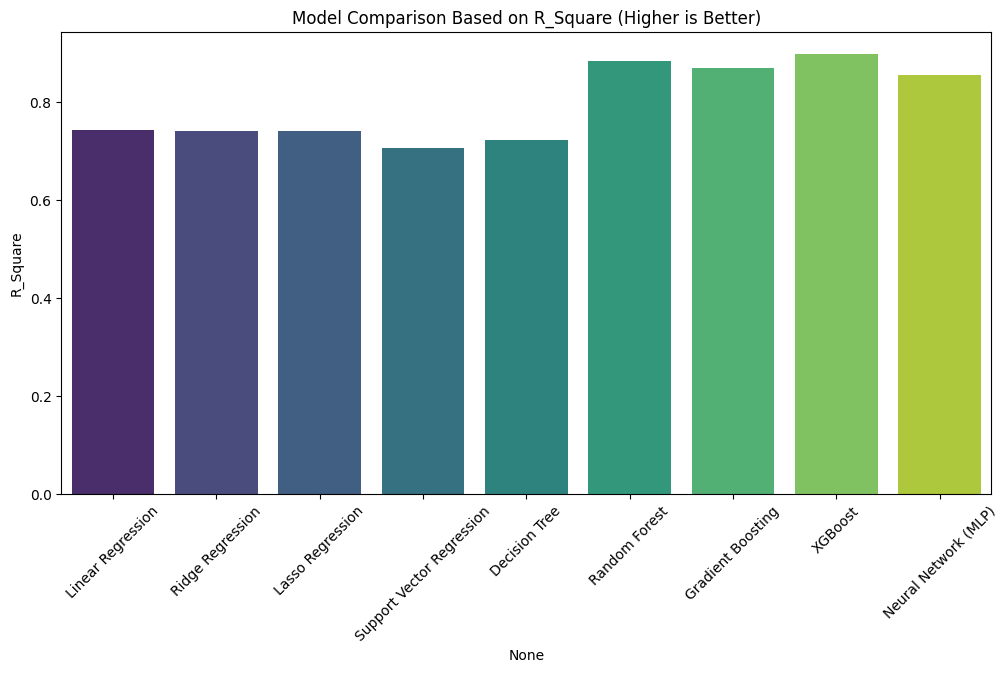

In [29]:
# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Comparison Based on R_Square (Higher is Better)")
plt.ylabel("R_Square")
plt.show()

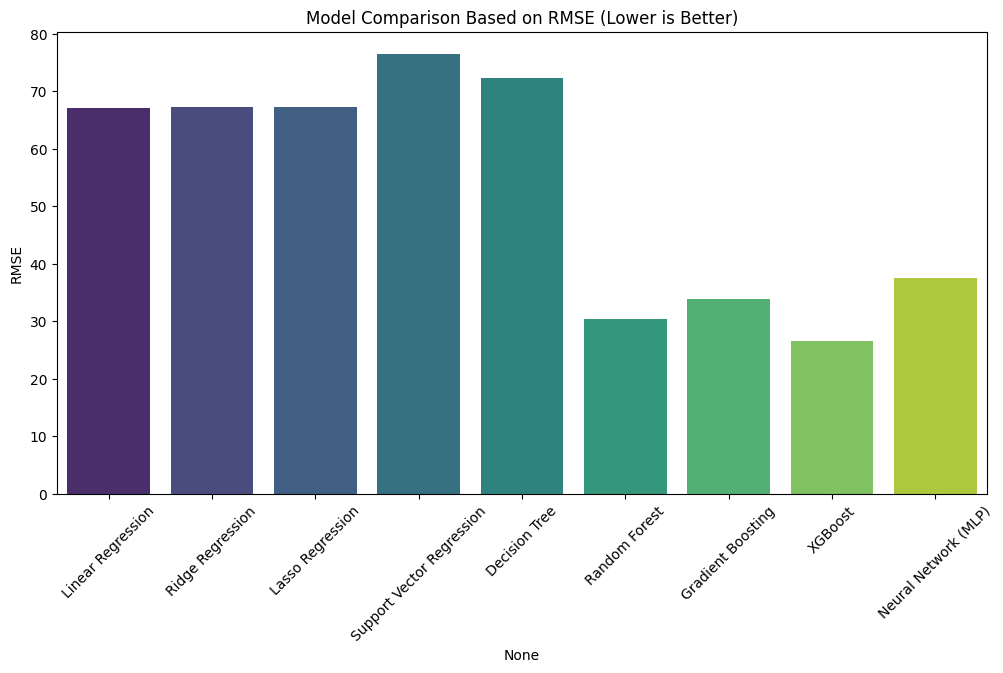

In [30]:
# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Comparison Based on RMSE (Lower is Better)")
plt.ylabel("RMSE")
plt.show()

### Deploying the Model for Prediction

In [31]:
import joblib

# Assuming XGBoost performed the best
best_model = XGBRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Save the model
joblib.dump(best_model, "concrete_strength_model.pkl")
print("Model saved successfully!")

Model saved successfully!
